#Bruce Kirschbaum - CS634 (Data Mining) Term Project
## Movie Recommendation System

In [14]:
# Load dataset
import pandas as pd

genome_scores = pd.read_csv('/content/drive/MyDrive/CS634/Pre-Processed Data/filtered-genome-scores.csv')
genome_tags = pd.read_csv('/content/drive/MyDrive/CS634/Pre-Processed Data/genome-tags.csv')
movies = pd.read_csv('/content/drive/MyDrive/CS634/Pre-Processed Data/filtered-movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/CS634/Pre-Processed Data/normalized_ratings.csv')

Number of rows in 'filtered-genome-scores': 9929784
Number of rows in 'genome-tags': 1128
Number of rows in 'filtered-movies': 8803
Number of rows in 'normalized_ratings': 100836


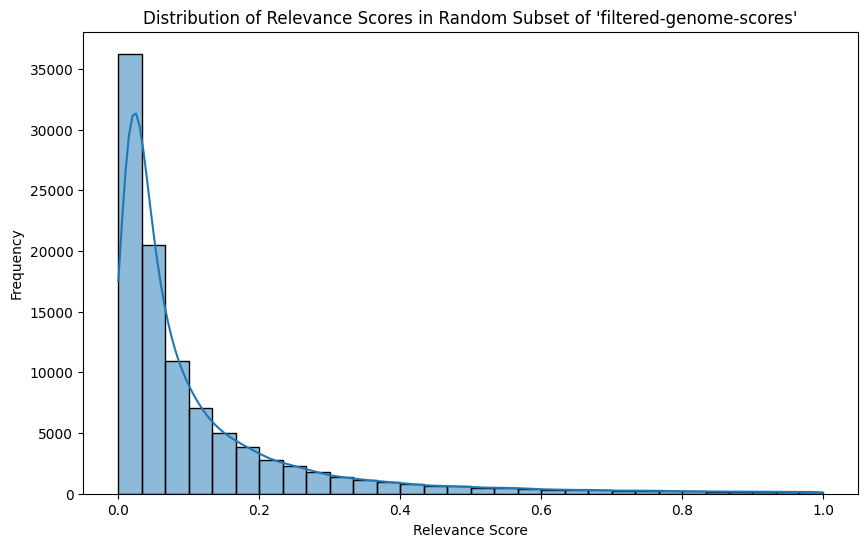

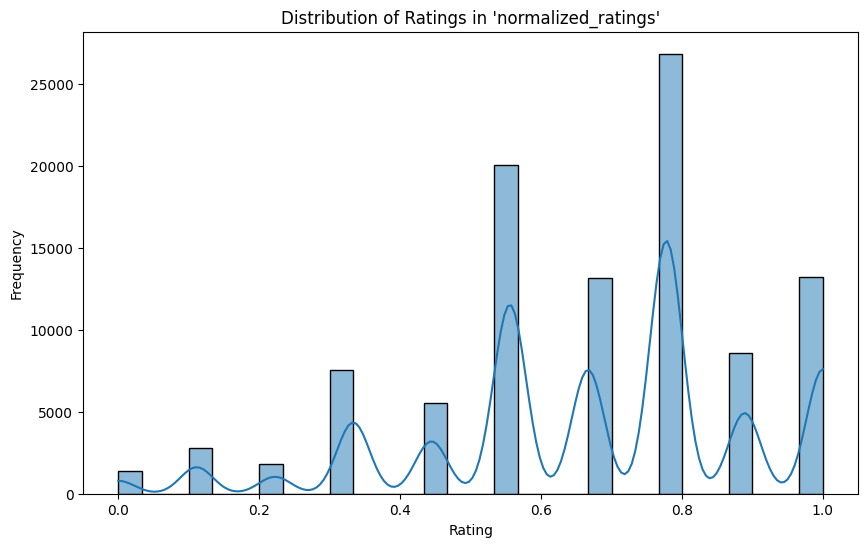

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of rows for each dataset
num_rows_genome_scores = len(genome_scores)
num_rows_genome_tags = len(genome_tags)
num_rows_movies = len(movies)
num_rows_ratings = len(ratings)

print(f"Number of rows in 'filtered-genome-scores': {num_rows_genome_scores}")
print(f"Number of rows in 'genome-tags': {num_rows_genome_tags}")
print(f"Number of rows in 'filtered-movies': {num_rows_movies}")
print(f"Number of rows in 'normalized_ratings': {num_rows_ratings}")

# Get a random subset of 'filtered-genome-scores'
random_subset_size = 100000
genome_scores_subset = genome_scores.sample(n=random_subset_size, random_state=42)

# Visualize the distribution of relevance scores in the random subset of 'filtered-genome-scores'
plt.figure(figsize=(10, 6))
sns.histplot(genome_scores_subset['relevance'], bins=30, kde=True)
plt.title(f"Distribution of Relevance Scores in Random Subset of 'filtered-genome-scores'")
plt.xlabel("Relevance Score")
plt.ylabel("Frequency")
plt.show()

# Visualize the distribution of ratings in 'normalized_ratings'
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=30, kde=True)
plt.title("Distribution of Ratings in 'normalized_ratings'")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Merge genome_scores and genome_tags
genome_data = pd.merge(genome_scores, genome_tags, on='tagId', how='left')

# Get average ratings of movies
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()

# Merge movies and average_ratings
movie_info = pd.merge(movies, average_ratings, on='movieId', how='left')

In [ ]:
print(genome_data.head(20))
print(movie_info.head(20))

In [ ]:
# Imports
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random

nltk.download('punkt')

In [19]:
# Input the title of the movie you're interested in
movie_title = "Toy Story (1995)"
#movie_title = "Sandlot, The (1993)"
#movie_title = "Cabin in the Woods, The (2012)"

In [20]:
# Find the movieId for the given title
input_movie_id = movie_info.loc[movie_info['title'] == movie_title, 'movieId'].values[0]

# Specify the number of movies and top tags to consider
num_movies = 8803
num_top_tags = 50
num_tags = 1128

# Extract the relevance scores for the specified movieId
relevance_scores = genome_data.loc[genome_data['movieId'] == input_movie_id, ['tag','tagId', 'relevance']]

# Sort the relevance scores in descending order and take the top tags
top_tags_input = relevance_scores.sort_values(by='relevance', ascending=False).head(num_top_tags)['tagId'].values
top_tags_names_input = relevance_scores.sort_values(by='relevance', ascending=False).head(num_top_tags)['tag'].values
print(f"Tags considered: {top_tags_names_input}\n")

# Extract the relevance scores for the specified tags
relevance_scores_input = genome_data.loc[(genome_data['tagId'].isin(top_tags_input)) & (genome_data['movieId'] == input_movie_id), 'relevance'].values
relevance_scores_input = np.reshape(relevance_scores_input, (1, -1))

# List to store similarity scores and their indices
similarity_scores_list = []

# Loop through all other movies
for i in range(num_movies):

    # Find the movieId
    #current_movie_id = movie_info['movieId'].iloc[i]

    # Extract the relevance scores for the current movie
    subset_data = genome_data.iloc[num_tags * i:num_tags * (i + 1)]

    # Extract the relevance scores for the current movie and specified tags
    relevance_scores_current_movie = subset_data.loc[(subset_data['tagId'].isin(top_tags_input)), 'relevance'].values
    relevance_scores_current_movie = np.reshape(relevance_scores_current_movie, (1, -1))
    relevance_scores_current_movie = relevance_scores_current_movie

    # Compute cosine similarity
    similarity_score = cosine_similarity(relevance_scores_input, relevance_scores_current_movie)[0, 0]
    similarity_scores_list.append((i, similarity_score))

# Sort the list by similarity scores in descending order
similarity_scores_list.sort(key=lambda x: x[1], reverse=True)

# Print when completed
print("Complete!")

Tags considered: ['toys' 'computer animation' 'pixar animation' 'animation'
 'kids and family' 'kids' 'pixar' 'children' 'animated' 'cartoon'
 'imdb top 250' 'story' 'childhood' 'friendship' 'great movie'
 'unlikely friendships' 'adventure' 'disney animated feature' 'nostalgic'
 'heartwarming' 'original' 'light' 'fun' 'good' 'family' 'classic' 'great'
 'highly quotable' 'cgi' 'fun movie' 'disney' 'cute' 'clever'
 'original plot' 'cute!' 'feel-good' 'storytelling'
 'oscar (best animated feature)' 'sweet' 'redemption' 'technology'
 'oscar winner' 'mentor' 'very good' 'visually stunning' 'great ending'
 'witty' 'dialogue' 'feel good movie' 'affectionate']

Complete!


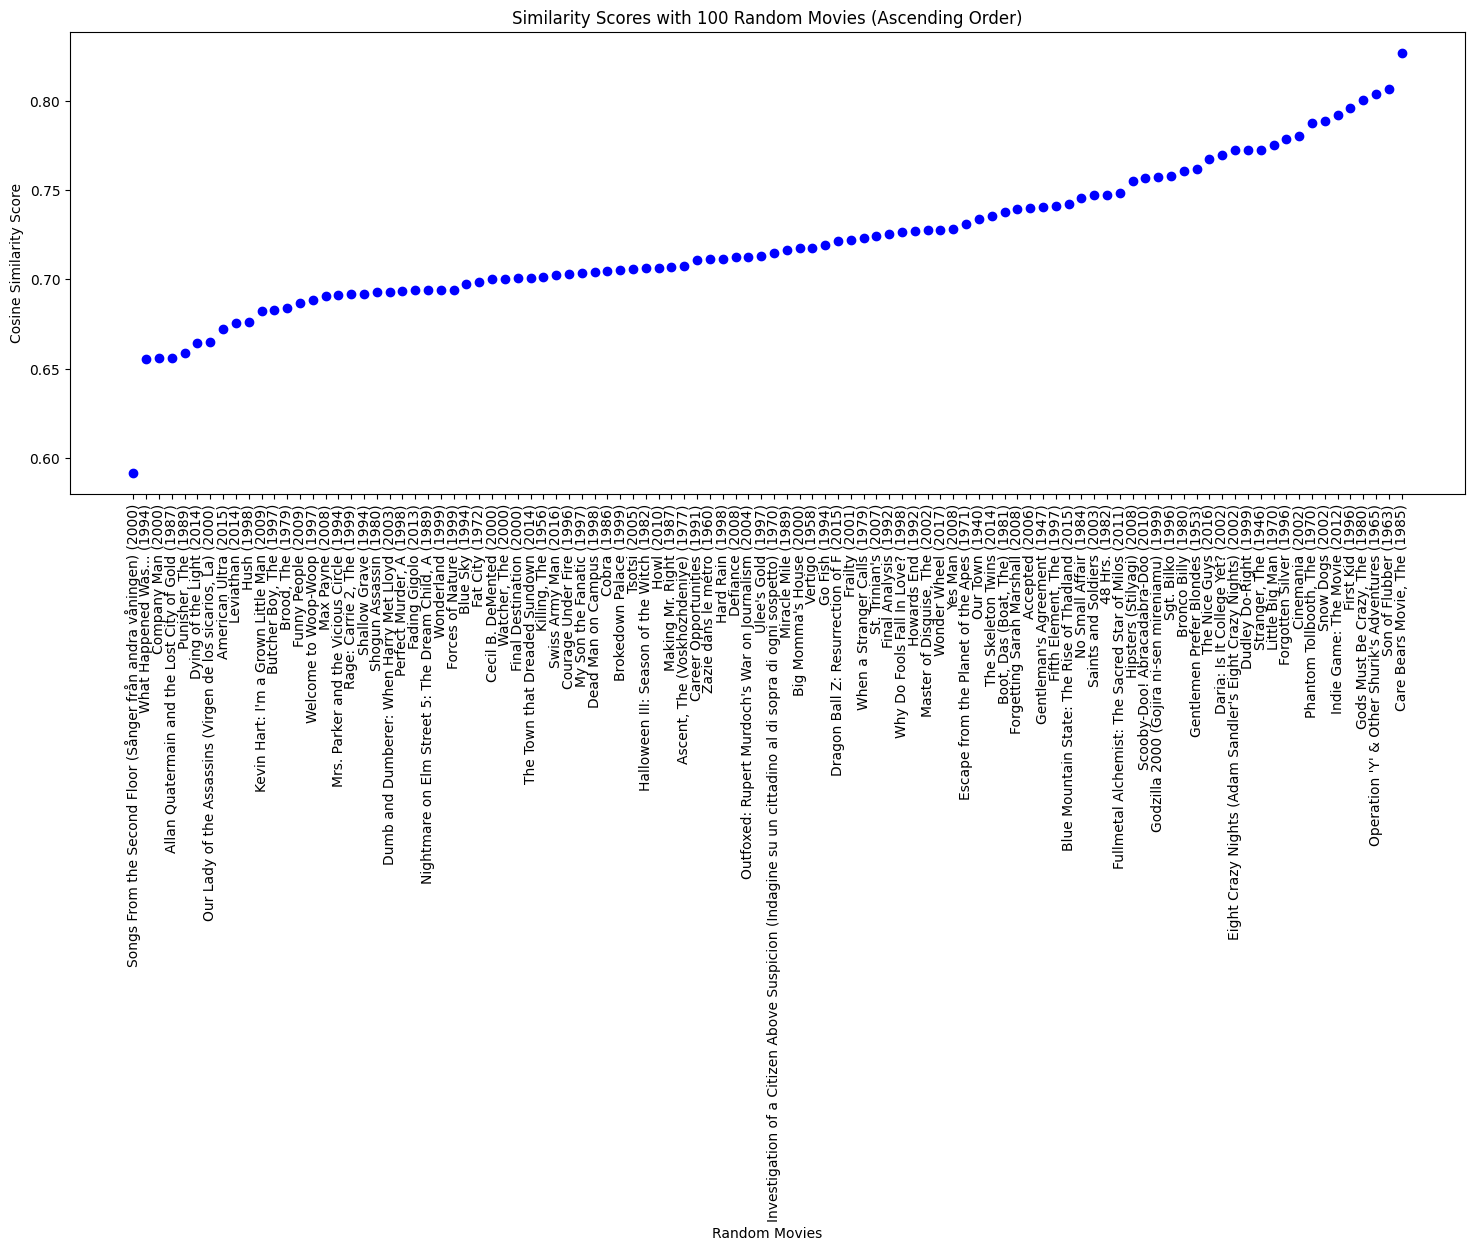

In [21]:
# Set the number of random movies to select
num_random_movies = 100

# Generate 100 random movie indices
random_movie_indices = random.sample(range(num_movies), num_random_movies)

# Initialize lists to store movie information and similarity scores
random_movie_titles = []
similarity_scores = []

# Extract information and compute similarity scores for each random movie
for random_movie_index in random_movie_indices:
    random_movie_id = movie_info['movieId'].iloc[random_movie_index]
    random_movie_title = movie_info['title'].iloc[random_movie_index]

    relevance_scores_random_movie = genome_data.loc[(genome_data['tagId'].isin(top_tags_input)) & (genome_data['movieId'] == random_movie_id), 'relevance'].values
    relevance_scores_random_movie = np.reshape(relevance_scores_random_movie, (1, -1))

    similarity_score_random_movie = cosine_similarity(relevance_scores_input, relevance_scores_random_movie)[0, 0]

    random_movie_titles.append(random_movie_title)
    similarity_scores.append(similarity_score_random_movie)

# Sort the movies based on similarity scores in ascending order
sorted_indices = np.argsort(similarity_scores)
random_movie_titles = [random_movie_titles[i] for i in sorted_indices]
similarity_scores = [similarity_scores[i] for i in sorted_indices]

# Plot the similarity scores using scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(range(num_random_movies), similarity_scores, color='blue', marker='o')
plt.xlabel('Random Movies')
plt.ylabel('Cosine Similarity Score')
plt.title('Similarity Scores with 100 Random Movies (Ascending Order)')
plt.xticks(range(num_random_movies), random_movie_titles, rotation='vertical')
plt.show()

In [22]:
# Print the top 10 similarity scores
print("Top 5 Similarity Scores:")
for i, (movie_i, similarity_score) in enumerate(similarity_scores_list[1:6]):
    movie_name = movie_info['title'].iloc[movie_i]
    movie_id = movie_info['movieId'].iloc[movie_i]
    genres = movie_info['genres'].iloc[movie_i]
    print(f"Rank {i + 1}: Movie ID {movie_id}, Movie Name: {movie_name}, Genres: {genres}, Similarity Score: {similarity_score}")

# Function to process text and extract keywords
def extract_keywords(genres):
    # Split the genres string into individual genres
    genre_list = genres.split('|')

    # Tokenize and process each genre
    tokens = []
    for genre in genre_list:
        for token in word_tokenize(genre.lower()):
            if token.isalpha():
                tokens.append(token)

    return tokens

# Choose the top movie from the recommendations and get info about it
top_movie_index = similarity_scores_list[1][0]
top_movie_id = movie_info['movieId'].iloc[top_movie_index]
top_movie_title = movie_info['title'].iloc[top_movie_index]
top_movie_genres = movie_info['genres'].iloc[top_movie_index]
top_movie_rating = movie_info['rating'].iloc[top_movie_index]

# Get info from inputted movie
input_movie_genres = movie_info.loc[movie_info['movieId'] == input_movie_id, 'genres'].iloc[0]

# Extract keywords from the movies' genres and find shared genres
top_keywords = extract_keywords(top_movie_genres)
input_keywords = extract_keywords(input_movie_genres)
shared_genres = set(top_keywords) & set(input_keywords)
if not shared_genres:
  shared_genres = top_keywords

# For the inputted movie:
# Extract the relevance scores for the inputted movie
relevance_scores_input = genome_data.loc[genome_data['movieId'] == input_movie_id, ['tag', 'relevance']]

# Sort the relevance scores in descending order and take the top 10
top_relevance_input = relevance_scores_input.sort_values(by='relevance', ascending=False).head(10)


# For the top recommended movie:
# Extract the relevance scores for the top recommended movie
relevance_scores_top_movie = genome_data.loc[genome_data['movieId'] == top_movie_id, ['tag', 'relevance']]

# Sort the relevance scores in descending order and take the top 10
top_relevance_top_movie = relevance_scores_top_movie[relevance_scores_top_movie['tag'].isin(top_tags_names_input)].sort_values(by='relevance', ascending=False).head(10)


# Define a relevance threshold to output relevant tags
relevance_threshold = .8

# Merge the DataFrames on the 'tag' column
merged_relevance = pd.merge(
    relevance_scores_input,
    top_relevance_top_movie,
    on='tag',
    suffixes=('_input', '_top')
)

# Filter rows where both relevance scores are above the relevance threshold
common_tags_above_threshold = merged_relevance[
    (merged_relevance['relevance_input'] > relevance_threshold) & (merged_relevance['relevance_top'] > relevance_threshold)
]

# Combine the tag names into a string
tag_names_str = ', '.join(common_tags_above_threshold['tag'].values)

# Generate an explanation based on keywords
explanation = f"The model recommends '{top_movie_title}' because of its genres, including: {', '.join(shared_genres)}.\nThe average user rating for this movie is {round(top_movie_rating * 4.5 + .5,2)} out of 5.\nBoth of these movies also share highly relevant tags such as {tag_names_str}.\n"

# Print the explanation
print("\nExplanation:")
print(explanation)

# Display the top 10 relevance scores for the inputted movie
print("Top 10 Relevance Scores for Inputted Movie:")
print(top_relevance_input)

# Display the top 10 relevance scores for the top recommended movie
print("\nTop 10 Relevance Scores for Top Recommended Movie:")
print(top_relevance_top_movie)

Top 5 Similarity Scores:
Rank 1: Movie ID 6377, Movie Name: Finding Nemo (2003), Genres: Adventure|Animation|Children|Comedy, Similarity Score: 0.9903791927988659
Rank 2: Movie ID 4886, Movie Name: Monsters, Inc. (2001), Genres: Adventure|Animation|Children|Comedy|Fantasy, Similarity Score: 0.988455028995913
Rank 3: Movie ID 3114, Movie Name: Toy Story 2 (1999), Genres: Adventure|Animation|Children|Comedy|Fantasy, Similarity Score: 0.9869465476386496
Rank 4: Movie ID 50872, Movie Name: Ratatouille (2007), Genres: Animation|Children|Drama, Similarity Score: 0.983337767894283
Rank 5: Movie ID 68954, Movie Name: Up (2009), Genres: Adventure|Animation|Children|Drama, Similarity Score: 0.9815511533793018

Explanation:
The model recommends 'Finding Nemo (2003)' because of its genres, including: adventure, animation, comedy, children.
The average user rating for this movie is 3.96 out of 5.
Both of these movies also share highly relevant tags such as animated, animation, cartoon, children, co